In [1]:
import inspect
import numpy as np
import pandas

def list_size(variable, callers_local_vars):
    list_size_recursive(' # ', variable, callers_local_vars)

def list_size_recursive(header, variable, callers_local_vars):
    if type(variable) == list or type(variable) == pandas.core.series.Series:
        print(header, 'len(', str([k for k, v in callers_local_vars if v is variable][0]), ') = ', len(variable), sep='')
        if(len(variable) > 0):
            header += '  '
            list_size_recursive(header, variable[0], callers_local_vars)

def nparray_size(variable, callers_local_vars):
    if(type(variable) == np.ndarray):
        print(' # ', str([k for k, v in callers_local_vars if v is variable][0]), '.shape = ', variable.shape, sep='')

# shows the value of variables for debugging
def see(variable, all=0):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    print('# ', str([k for k, v in callers_local_vars if v is variable][0]), ' (', type(variable), ')', sep='', end='')
    if all or (type(variable) != list and type(variable) != np.ndarray and type(variable) != pandas.core.series.Series):
        print(' = ', variable, sep='')
    else:
        print('')
    list_size(variable, callers_local_vars)
    nparray_size(variable, callers_local_vars)


Text(0,0.5,'Happiness.Score')

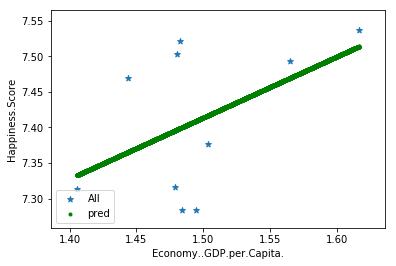

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# load data
d = pd.read_csv('2017.csv')
gdp = np.array(d['Economy..GDP.per.Capita.'])[:10]
happiness = np.array(d['Happiness.Score'])[:10]

# linear regression
lr = linear_model.LinearRegression()
lr.fit(gdp.reshape((-1,1)), happiness)
gdp_test = np.linspace(gdp.min(), gdp.max(), 10000)
happiness_predict = lr.predict(gdp_test.reshape((-1,1)))

# plots graphs
fig, ax = plt.subplots()
ax.scatter(gdp, happiness, label='All', marker='*')
ax.scatter(gdp_test, happiness_predict, c='green', marker='.' , label='pred')
ax.legend(loc='lower left')
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Happiness.Score')

In [3]:
lr.coef_

array([0.85857367])

In [4]:
lr.intercept_

6.126043984675304

In [5]:
import numpy as np

# linear neural network
def linear_nn(x, w):
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    return np.matmul(w, x_with_bias.transpose())

In [6]:
# computues gradient vector dL/dw
def grad(x, w, y):
    error = linear_nn(x, w) - y
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    return 2 * np.matmul(x_with_bias.transpose(), error)

In [7]:
# updates parameter w
def update(x, w, y, eta):
    g = grad(x, w, y)
    w = w - eta * g
    return w

In [8]:
def squared_error(pred, truth):
    return np.sum((pred - truth) ** 2)

In [9]:
def train(x, y, eta, iterNum):
    w = np.random.random(2)
    lossL = []
    for _ in range(iterNum):
        w = update(x, w, y, eta)
        lossL.append(squared_error(linear_nn(x, w), y))
    return w, lossL

In [10]:
w, lossL = train(gdp, happiness, 0.01, 100000)

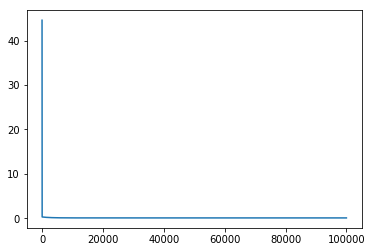

In [11]:
fig, ax = plt.subplots()
ax.plot(lossL)

Text(0,0.5,'Happiness.Score')

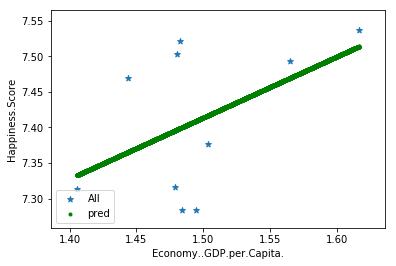

In [12]:
happiness_predict = w[0] * gdp_test + w[1]
fig, ax = plt.subplots()
ax.scatter(gdp, happiness, label='All', marker='*')
ax.scatter(gdp_test, happiness_predict, c='green', marker='.' , label='pred')
ax.legend(loc='lower left')
ax.set_xlabel('Economy..GDP.per.Capita.')
ax.set_ylabel('Happiness.Score')

In [13]:
w[0]

0.8585736857722748

In [14]:
lr.coef_[0]

0.8585736734837

In [15]:
w[1]

6.126043966279247

In [16]:
lr.intercept_

6.126043984675304